## Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('COVIDVaccineTweet+Sentiment.csv')
df.head()

/Users/guoyuxin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,scores,compound,sentiment
0,0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0,False,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.4019,positive
1,1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1.0,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",-0.1027,neutral
2,2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0,False,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.2500,neutral
3,3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446.0,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0.0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [61]:
df['sentiment'].value_counts()

neutral     25716
positive    13232
negative     5760
Name: sentiment, dtype: int64

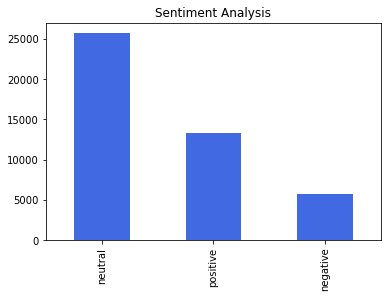

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["royalblue"]
sns.set_palette(sns.color_palette(colors))
plt.title('Sentiment Analysis')
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [2]:
## Identify vaccine brand key words from hashtages
df['hashtags'].fillna("Not Specified",inplace = True)
df['Pfizer']=df['hashtags'].str.contains('pfizer', case=False).astype(int)
df['Moderna']=df['hashtags'].str.contains('moderna', case=False).astype(int)
searchfor=['johnson','j&j','jnj','janssen']
df['Johnson & Johnson']=df['hashtags'].str.contains('|'.join(searchfor), case=False).astype(int)
## Convert sentiment categories into 1,0,-1
df['sent']=np.where(df['sentiment'] == 'neutral', 0, np.where(df['sentiment'] == 'positive', 1, -1))
## Creat a column for vaccine brands
df['vaccine brand']=np.where(df['Pfizer'] == 1, 'Pfizer', np.where(df['Moderna'] == 1, 'Moderna', np.where(df['Johnson & Johnson'] == 1,'Johnson & Johnson','no brand')))
df=pd.concat([df,pd.get_dummies(df['sentiment'])], axis=1, join="inner")
## Remove useless columns
df=df.drop(['Unnamed: 0','id','user_name'],axis=1)
## Remove missing values
df=df.dropna()
## Adjust column type to align with the data type stored in that column
import datetime as dt
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d', errors='coerce').dt.date
df['user_created']=pd.to_datetime(df['user_created'],format='%Y-%m-%d', errors='coerce').dt.date
df[['user_followers', 'user_friends', 'user_favourites']]=df[['user_followers', 'user_friends', 'user_favourites']].astype(str).astype(float)
df['user_verified']=df['user_verified'].replace(['False','True'],[False, True])
df['user_verified']=df['user_verified'].astype(int)
df['favorites']=df['favorites'].astype(int)
df['is_retweet']=df['is_retweet'].astype(int)

In [3]:
df.head()

,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,...,compound,sentiment,Pfizer,Moderna,Johnson & Johnson,sent,vaccine brand,negative,neutral,positive
0,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08,405.0,1692.0,3247.0,0,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],...,0.4019,positive,1,0,0,1,Pfizer,0,0,1
1,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21,834.0,666.0,178.0,0,2020-12-13,While the world has been on the wrong side of ...,Not Specified,...,-0.1027,neutral,0,0,0,0,no brand,0,1,0
2,Your Bed,"heil, hydra 🖐☺",2020-06-25,10.0,88.0,155.0,0,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",...,0.2500,neutral,1,1,0,0,Pfizer,0,1,0
3,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10,49165.0,3933.0,21853.0,1,2020-12-12,"Facts are immutable, Senator, even when you're...",Not Specified,...,0.0000,neutral,0,0,0,0,no brand,0,1,0
5,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26,105.0,108.0,106.0,0,2020-12-12,Does anyone have any useful advice/guidance fo...,Not Specified,...,0.7003,positive,0,0,0,1,no brand,0,0,1


In [4]:
## Create a table of distribution of each variable for each vaccine brand
df['days of usage']=(df['date']-df['user_created'])/ np.timedelta64(1, 'D')
gb_brand=df.groupby('vaccine brand',as_index=False).agg(
    {
         'negative': 'mean',
         'neutral':'mean',
         'positive':'mean',
         'user_location':'count',
         'user_followers': 'mean',
         'user_friends':'mean',
         'user_favourites':'mean',
         'user_verified':'mean',
         'retweets':'mean',
         'favorites':'mean',
         'is_retweet':'mean',
         'days of usage':'mean'
    }
)
gb_brand.rename(columns = {'days of usage':'average days of usage','user_location':'# of users','user_verified':'percent user_verified' ,'user_followers':' average user_followers',
                              'user_friends':'average user_friends','user_favourites':'average user_favourites','tuser_verified':'percent user_verified','retweets':'average # of retweets','favorites':'average favorites','is_retweet':'percent is_retweet'}, inplace = True)
   


In [5]:
gb_brand

,vaccine brand,negative,neutral,positive,# of users,average user_followers,average user_friends,average user_favourites,percent user_verified,average # of retweets,average favorites,percent is_retweet,average days of usage
0,Johnson & Johnson,0.118881,0.643357,0.237762,143,7077.475524,1484.349650,12825.384615,0.167832,0.818182,2.104895,0,2850.986014
1,Moderna,0.101217,0.589878,0.308904,8378,18367.890785,2082.878253,26488.889353,0.056577,0.813201,8.389831,0,3087.267486
2,Pfizer,0.103310,0.587486,0.309203,5498,37384.687705,1708.098581,16702.765187,0.099309,3.318661,14.089123,0,2769.875227
3,no brand,0.140995,0.568673,0.290332,30689,177082.201310,1298.240249,13489.509368,0.151683,4.558571,19.400534,0,2663.250057


In [6]:
## Monthly tweet data per vaccine brand
df['week']=pd.to_datetime(df['date']).dt.strftime('%Y-%U')
df['month']=pd.to_datetime(df['date']).dt.strftime('%Y-%m')
gb_brand_date=df.groupby(['month','vaccine brand'],as_index=False).agg(
    {
         'negative': 'mean',
         'neutral':'mean',
         'positive':'mean',
         'user_location':'count',
         'user_followers': 'mean',
         'user_friends':'mean',
         'user_favourites':'mean',
         'user_verified':'mean',
         'retweets':'mean',
         'favorites':'mean',
         'is_retweet':'mean',
         'days of usage':'mean'
    }
)
gb_brand_date.rename(columns = {'days of usage':'average days of usage','user_location':'# of users','user_verified':'percent user_verified' ,'user_followers':' average user_followers',
                              'user_friends':'average user_friends','user_favourites':'average user_favourites','tuser_verified':'percent user_verified','retweets':'average # of retweets','favorites':'average favorites','is_retweet':'percent is_retweet'}, inplace = True)
   



In [7]:
gb_brand_date

,month,vaccine brand,negative,neutral,positive,# of users,average user_followers,average user_friends,average user_favourites,percent user_verified,average # of retweets,average favorites,percent is_retweet,average days of usage
0,2020-12,Johnson & Johnson,0.000000,0.833333,0.166667,6,1042.333333,345.333333,10829.333333,0.000000,0.166667,0.000000,0,903.666667
1,2020-12,Moderna,0.000000,0.700000,0.300000,10,14767.300000,3072.300000,4567.000000,0.500000,1.400000,4.700000,0,3516.900000
2,2020-12,Pfizer,0.083024,0.613383,0.303594,807,81023.532838,1350.242875,13009.903346,0.177200,2.391574,15.888476,0,2742.208178
3,2020-12,no brand,0.126619,0.513669,0.359712,695,80185.907914,1179.319424,15594.201439,0.174101,1.981295,10.388489,0,2552.948201
4,2021-01,Johnson & Johnson,0.000000,0.666667,0.333333,3,1829.333333,1263.666667,35543.333333,0.333333,0.000000,0.333333,0,3404.333333
5,2021-01,Moderna,0.500000,0.250000,0.250000,4,375.250000,644.000000,16884.000000,0.000000,0.500000,0.250000,0,2096.750000
6,2021-01,Pfizer,0.123112,0.536254,0.340634,1324,35401.874622,1399.471299,12928.954683,0.086858,1.508308,9.737160,0,2561.583082
7,2021-01,no brand,0.147575,0.484004,0.368421,969,17326.350877,1237.277606,12857.557276,0.077399,2.150671,8.678019,0,2662.841073
8,2021-02,Johnson & Johnson,0.187500,0.625000,0.187500,16,6763.375000,1909.812500,6353.062500,0.187500,0.687500,2.250000,0,2665.500000
9,2021-02,Moderna,0.111196,0.586443,0.302361,1313,22118.146992,2797.149276,20342.040366,0.065499,0.844631,5.656512,0,3023.259711


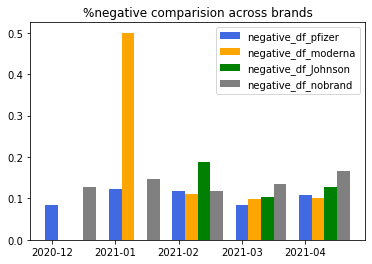

In [8]:
import matplotlib.pyplot as plt
width =0.2

df_pfizer=gb_brand_date[gb_brand_date['vaccine brand']=='Pfizer']
df_moderna=gb_brand_date[gb_brand_date['vaccine brand']=='Moderna']
df_Johnson=gb_brand_date[gb_brand_date['vaccine brand']=='Johnson & Johnson']
df_nobrand=gb_brand_date[gb_brand_date['vaccine brand']=='no brand']


plt.bar(np.arange(len(df_pfizer)),df_pfizer['negative'],color='royalblue',width=width,label='negative_df_pfizer')
plt.bar(np.arange(len(df_moderna))+ width,df_moderna['negative'],color='orange',width=width,label='negative_df_moderna')
plt.bar(np.arange(len(df_Johnson))+ 2*width,df_Johnson['negative'],color='green',width=width,label='negative_df_Johnson')
plt.bar(np.arange(len(df_nobrand))+ 3*width,df_nobrand['negative'],color='grey',width=width,label='negative_df_nobrand')

labels = df_pfizer['month']
plt.title('%negative comparision across brands')
plt.xticks(range(len(df_pfizer)), labels)
plt.legend(loc="upper right")
plt.show()

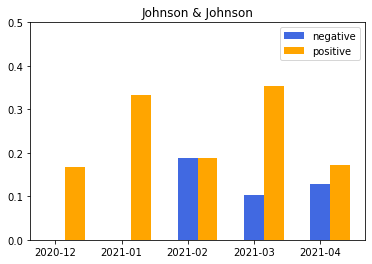

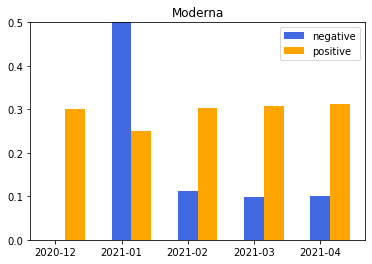

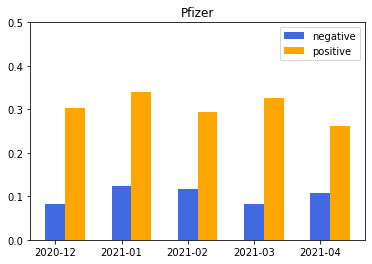

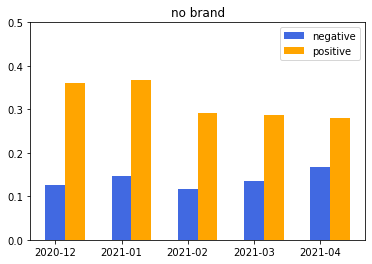

In [55]:
import matplotlib.pyplot as plt
for i in gb_brand_date['vaccine brand'].unique():
    df_=gb_brand_date[gb_brand_date['vaccine brand']==i]
    width =0.3
    plt.bar(np.arange(len(df_)),df_['negative'],color='royalblue',width=width,label='negative')
    plt.bar(np.arange(len(df_))+ width,df_['positive'],color='orange',width=width,label='positive')
    labels = df_['month']
    plt.title(i)
    plt.xticks(range(len(df_)), labels)
    plt.legend(loc="upper right")
    plt.ylim((0, 0.5)) 
    plt.show()

Text(0.5, 1.0, 'Sentiment Scores vs User Verified')

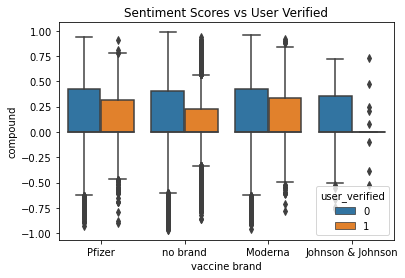

In [9]:
import seaborn as sns
sns.boxplot(x='vaccine brand',y='compound',hue='user_verified', data=df).set_title('Sentiment Scores vs User Verified')

## Test for Independence between Vaccine Brand and Sentiment Category

In [10]:
df.groupby(['vaccine brand','sent']).count().iloc[:,0:1]

user_location
vaccine brand     sent               
Johnson & Johnson -1               17
                   0               92
                   1               34
Moderna           -1              848
                   0             4942
                   1             2588
Pfizer            -1              568
                   0             3230
                   1             1700
no brand          -1             4327
                   0            17452
                   1             8910

In [11]:
## chi-squared contingency table test:
from scipy.stats import chi2_contingency
obs = np.array([[16, 83, 33], [848, 4942, 2588],[568,3230,1700],[4328,17461,8911]])
chi2_contingency(obs)
## p-value < 0.05, there is sufficient evidence to conclude that vaccine brand is not independent of sentiments

(132.35745170267808,
 4.097078587287638e-26,
 6,
 array([[1.70063523e+01, 7.59262772e+01, 3.90673705e+01],
        [1.07938803e+03, 4.81901780e+03, 2.47959417e+03],
        [7.08340342e+02, 3.16244448e+03, 1.62721517e+03],
        [3.95526528e+03, 1.76586114e+04, 9.08612329e+03]]))

In [12]:
con_table=pd.DataFrame(obs, index=['Johnson & Johnson','Moderna','Pfizer','no brand'],columns=['negative','neutral','positive'])

In [13]:
con_table

,negative,neutral,positive
Johnson & Johnson,16,83,33
Moderna,848,4942,2588
Pfizer,568,3230,1700
no brand,4328,17461,8911


In [14]:
dic={('J&J','negative'): 16*20, ('Moderna','negative'): 848, ('Pfizer','negative'): 568, ('no brand','negative'): 4328,
('J&J','neutral'): 83*20, ('Moderna','neutral'): 4942, ('Pfizer','neutral'): 3230, ('no brand','neutral'): 17461,
('J&J','positive'): 33*20, ('Moderna','positive'): 2588, ('Pfizer','positive'): 1700, ('no brand','positive'): 8911
}

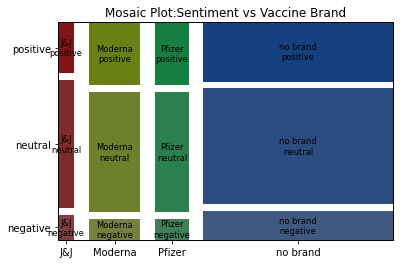

In [15]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(dic,gap=0.05, title='Mosaic Plot:Sentiment vs Vaccine Brand')
plt.show()

## Correlation Analysis

In [28]:
df_num= df.loc[:, df.dtypes != object]

In [29]:
df_num=df_num.drop(['negative', 'neutral', 'positive','is_retweet'],axis=1)

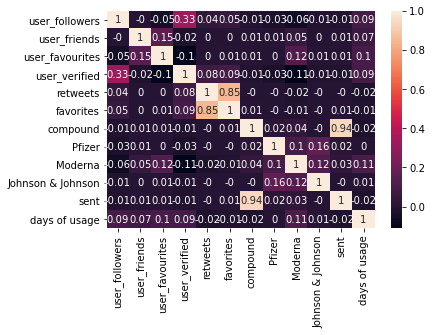

In [30]:
import seaborn as sns
corr_matrix = round(df_num.corr(), 2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Predict Sentiment

In [31]:
## Imbalanced Class
df_negative = df_num[df_num.sent==-1]
df_positive = df_num[df_num.sent==0]
df_neutral = df_num[df_num.sent==1]
len(df_positive)

25716

In [32]:
## Deal with imbalanced data
# upsample majority class
from sklearn.utils import resample

df_negative_upsampled = resample(df_negative, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_positive),    # to match majority class
                                 random_state=123) # reproducible results
 
df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_positive),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_positive, df_negative_upsampled,df_neutral_upsampled])
 
# Display new class counts
df_upsampled.sent.value_counts()

-1    25716
 1    25716
 0    25716
Name: sent, dtype: int64

In [56]:
df_upsampled=df_upsampled.rename(columns={'days of usage': 'days_of_usage','Johnson & Johnson':'J&J'})
from sklearn.model_selection import train_test_split
X = df_upsampled.drop(['sent','compound'], axis = 1)
Y = df_upsampled['sent']
# Splitting test and train data
seed = 123
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [46]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=123,multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.34      0.82      0.48      7732
           0       0.49      0.05      0.09      7705
           1       0.35      0.16      0.22      7708

    accuracy                           0.35     23145
   macro avg       0.39      0.35      0.26     23145
weighted avg       0.39      0.35      0.26     23145



In [64]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 1.088428
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                   sent   No. Observations:                54003
Model:                        MNLogit   Df Residuals:                    53981
Method:                           MLE   Df Model:                           20
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                0.009270
Time:                        00:47:29   Log-Likelihood:                -58778.
converged:                       True   LL-Null:                       -59328.
Covariance Type:            nonrobust   LLR p-value:                1.779e-220
         sent=0       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0239      0.024      0.997      0.319      -0.023       0.071
user_followers

## Random Forest

In [39]:
## Train Test Split
from sklearn.model_selection import train_test_split
X = df_upsampled.drop(['sent','compound'], axis = 1)
Y = df_upsampled['compound']
# Splitting test and train data
seed = 123
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
feature_list = list(X.columns)
#fitting Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
## Predict
predictions = rf.predict(X_test)
## Evaluate
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
r2_rf=r2_score(y_test, predictions)
mae_rf=np.mean(errors)
baseline_preds = y_test.mean()
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Mean Absolute Error: 0.14
Average baseline error:  0.38


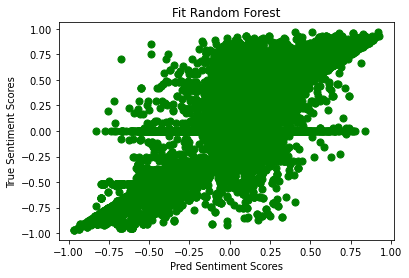

In [41]:
plt.scatter(predictions,y_test, s = 50,color ='green')
plt.xlabel('Pred Sentiment Scores') 
plt.ylabel("True Sentiment Scores") 
plt.title("Fit Random Forest") 
plt.show()

In [65]:
feature_likes = pd.Series(rf.feature_importances_,index=df_upsampled.drop(['sent','compound'], axis = 1).columns).sort_values(ascending=False).round(2)

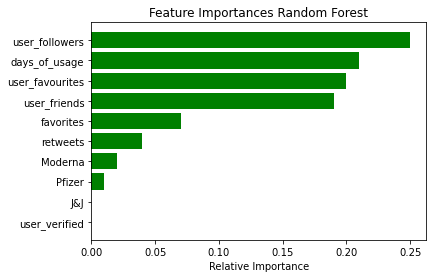

In [68]:
importances = feature_likes.values
indices = np.argsort(importances)

plt.title('Feature Importances Random Forest')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')

plt.yticks(range(len(indices)), [feature_likes.index[i] for i in indices])

plt.xlabel('Relative Importance')
plt.show()